Link del dataset: https://www.kaggle.com/datasets/jgarsdev/crimen

## Contexto

Mediante los datos de los crimines ocurridos en California durante el año 2013 hasta el año 2018, queremos obtener un modelo el cual logre predecir las características de un futuro delito. Mediante modificaciones y correcciones que le realizaremos a nuestra base de datos, analizaremos principalmente en las caracteristicas de los criminales y del evento.

¿Cómo serán las características a predecir?
Vamos a segmentar los delitos en dos tipos según ssu gravedad.
Si al finalizar el evento, al menos una persona resultó herida, la gravedad será baja. Mientras que si en el evento resultó al menos una persona herida y al menos una persona fallecida, la gravedad del crímen será alta.

Para ello debemos realizar los siguientes pasos:

**PASOS A SEGUIR**
1- Importar y abrir el dataframe
2- Analisis básico de los datos
3- Limpieza, correciones y trasnformaciones de los datos
4- Análisis de las variables
5- Union con nueva base de datos para la obtener mayor informacion
6- Escalado
7- Encoding variables categóricas
8- Primer modelo
9- Segundo modelo
10- Matríz de confusión y métricas


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from funciones import estadisticas_injured
from funciones import estadisticas_killed
from funciones import estadisticas_gun
from funciones import eliminar_columna
from funciones import reemplazo_nulos
from funciones import eliminar_lista_columnas


C:\Users\Usuario\anaconda3\envs\progrmacion_orientada_objetos\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Crimen Data

In [3]:
crimen_df = pd.read_csv('data/gun-violence-data_01-2013_03-2018-california.csv')
crimen_df

,Unnamed: 0,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
1,8,479389,2013-01-21,California,Brentwood,1100 block of Breton Drive,0,4,http://www.gunviolencearchive.org/incident/479389,http://sanfrancisco.cbslocal.com/2013/01/22/4-...,...,NaN,0::Teen 12-17||1::Teen 12-17||2::Teen 12-17||4...,0::Male||1::Male||2::Male||3::Male||4::Male,NaN,NaN,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.contracostatimes.com/ci_22426767/br...,11.0,7.0
2,16,479580,2013-02-03,California,Yuba (county),5800 block of Poplar Avenue,1,3,http://www.gunviolencearchive.org/incident/479580,http://sacramento.cbslocal.com/2013/02/04/1-de...,...,0::20||4::25||5::18||6::19,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Female||4::Male||5::Male|...,0::Teng Yang||1::Tou Yang||2::Xong Yang||3::Ya...,4::Drive by - Random victims||5::Drive by - Ra...,0::Killed||1::Injured||2::Injured||3::Injured|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://news.asiantown.net/r/28306/no-death-pen...,3.0,4.0
3,19,480311,2013-02-11,California,Vallejo,800 block of Humboldt Street,1,4,http://www.gunviolencearchive.org/incident/480311,http://archive.news10.net/news/article/229997/...,...,0::22,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Female||4::Female,0::Oscar Garcia,NaN,0::Killed||1::Injured||2::Injured||3::Injured|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.timesheraldonline.com/article/ZZ/20...,14.0,3.0
4,22,480358,2013-02-19,California,Orange (county),Katella Avenue,4,3,http://www.gunviolencearchive.org/incident/480358,http://www.dailymail.co.uk/news/article-228117...,...,0::20||4::69||5::27||6::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||4::Male||5::Male||6::Male,0::Courtney Aoki||4::Melvin Edwards||5::Jeremy...,NaN,0::Killed||1::Injured||2::Injured||3::Injured|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.nydailynews.com/news/national/2-sou...,72.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16301,239650,1082266,2018-03-31,California,Palmdale,37900 block of 47th St E,1,0,http://www.gunviolencearchive.org/incident/108...,https://local.nixle.com/alert/6489381/?sub_id=...,...,0::35,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Israel Castaneda,NaN,0::Killed||1::Unharmed,0::Victim||1::Subject-Suspect,http://ktla.com/2018/04/01/l-a-county-sheriffs...,36.0,21.0
16302,239655,1082089,2018-03-31,California,San Diego,8660 Miramar Rd,0,0,http://www.gunviolencearchive.org/incident/108...,https://www.nbcsandiego.com/news/local/Suspect...,...,NaN,0::Adult 18+,0::Male,NaN,NaN,0::Unharmed,0::Subject-Suspect,http://www.cbs8.com/story/37852105/man-fires-s...,77.0,39.0
16303,239657,1082394,2018-03-31,California,Shafter,300 block of Atlantic Ave,0,0,http://www.gunviolencearchive.org/incident/108...,http://www.bakersfield.com/news/breaking/none-...,...,0::55,0::Adult 18+,0::Male,0::John Wells,NaN,0::Arrested,0::Subject-Suspect,http://www.bakersfield.com/news/breaking/none-...,32.0,14.0
16304,239658,1082392,2018-03-31,California,Oakland,1700 block of 23rd Ave,1,0,http://www.gunviolencearchive.org/incident/108...,https://www.eastbaytimes.com/2018/04/01/man-fa...,...,0::29,0::Adult 18+,0::Male,NaN,NaN,0::Killed,0::

In [4]:
crimen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16306 entries, 0 to 16305
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   16306 non-null  int64  
 1   incident_id                  16306 non-null  int64  
 2   date                         16306 non-null  object 
 3   state                        16306 non-null  object 
 4   city_or_county               16306 non-null  object 
 5   address                      15658 non-null  object 
 6   n_killed                     16306 non-null  int64  
 7   n_injured                    16306 non-null  int64  
 8   incident_url                 16306 non-null  object 
 9   source_url                   16272 non-null  object 
 10  incident_url_fields_missing  16306 non-null  bool   
 11  congressional_district       15792 non-null  float64
 12  gun_stolen                   9579 non-null   object 
 13  gun_type        

# **Metadata**

Tenemos a disposicion una cantidad de 16.306 eventos
Los datos obtenidos son los siguientes:

1. `incident_id`: id del incidente

### Datos sobre la ubicacion del incidente:

2. `date`: dia en el que ocurrio el evento
3. `state`: estado (en este caso, todos los eventos ocurrienron en California)
4. `city_or_country`: ciudad o pais
5. `address`: direccion del evento
6. `latitude`: latitud
7. `location_description`: descripcion del lugar donde ocurrio el evento
8. `longitude`: longitud

### Datos sobre el incidente:

9. `n_killed`: numero de muertos
10. `n_injured`: numero de heridos
11. `incident_characteristics`: caracteristicas del incidente
12. `n_guns_involved`: numero de armas involucradas
13. `notes`: anotaciones con informacion extra
14. `gun_stolen`: si el arma fue robada o no
15. `gun_type`: tipo de arma

### Datos de los involucrados:

16. `participant_age`: edad de los involucrados
17. `participant_age_group`: agrupacion de las edades ( +18, +21, adulto, adolescente, niño)
18. `participant_gender`: genero de los participantes
19. `participant_name`: nombre de los participantes
20. `participant_relationship`: relacion del criminal con el/los parcipitante/s
21. `participant_status`: estado actual del participante
22. `participant_type`: tipo de participante (victima, sospechoso, culpable)


### Noticias sobre el incidente:

23. `incident_url`: link de los datos del incidente
24. `source_url`: link de la noticia del incidente
25. `incident_url_fields_missing`: eventos con url faltantes (True si no tenemos el url)
26. `sources`: link de la noticia del incidente


### Datos del distrito
27. `congressional_district`: numero del distrito del congreso
28. `state_house_district`: numero del distrito de la casa estatal
29. `state_senate_district`: numero del distrito del senado estatal

# <center>Análisis del data frame</center>

In [5]:
print(f"El dataset tiene {crimen_df.shape[1]} columnas y {crimen_df.shape[0]} filas\n")

print(f"Veamos los tipos de datos de las columnas  \n\nTipos de datos: \n{crimen_df.dtypes}")

El dataset tiene 30 columnas y 16306 filas

Veamos los tipos de datos de las columnas  

Tipos de datos: 
Unnamed: 0                       int64
incident_id                      int64
date                            object
state                           object
city_or_county                  object
address                         object
n_killed                         int64
n_injured                        int64
incident_url                    object
source_url                      object
incident_url_fields_missing       bool
congressional_district         float64
gun_stolen                      object
gun_type                        object
incident_characteristics        object
latitude                       float64
location_description            object
longitude                      float64
n_guns_involved                float64
notes                           object
participant_age                 object
participant_age_group           object
participant_gender              obje

De la columna `date` nos quedaremso solo con el año, asi que eliminaremos `month` y `day`


In [6]:
name = crimen_df["date"].str.split('-',expand=True)
name.columns = ['year', 'month', 'day']
crimen_df = pd.concat([crimen_df, name], axis=1)

crimen_df.head()

,Unnamed: 0,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,...,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,year,month,day
0,1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,...,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0,2013,01,01
1,8,479389,2013-01-21,California,Brentwood,1100 block of Breton Drive,0,4,http://www.gunviolencearchive.org/incident/479389,http://sanfrancisco.cbslocal.com/2013/01/22/4-...,...,NaN,NaN,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.contracostatimes.com/ci_22426767/br...,11.0,7.0,2013,01,21
2,16,479580,2013-02-03,California,Yuba (county),5800 block of Poplar Avenue,1,3,http://www.gunviolencearchive.org/incident/479580,http://sacramento.cbslocal.com/2013/02/04/1-de...,...,0::Teng Yang||1::Tou Yang||2::Xong Yang||3::Ya...,4::Drive by - Random victims||5::Drive by - Ra...,0::Killed||1::Injured||2::Injured||3::Injured|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://news.asiantown.net/r/28306/no-death-pen...,3.0,4.0,2013,02,03
3,19,480311,2013-02-11,California,Vallejo,800 block of Humboldt Street,1,4,http://www.gunviolencearchive.org/incident/480311,http://archive.news10.net/news/article/229997/...,...,0::Oscar Garcia,NaN,0::Killed||1::Injured||2::Injured||3::Injured|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.timesheraldonline.com/article/ZZ/20...,14.0,3.0,2013,02,11
4,22,480358,2013-02-19,California,Orange (county),Katella Avenue,4,3,http://www.gunviolencearchive.org/incident/480358,http://www.dailymail.co.uk/news/article-228117...,...,0::Courtney Aoki||4::Melvin Edwards||5::Jeremy...,NaN,0::Killed||1::Injured||2::Injured||3::Injured|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.nydailynews.com/news/national/2-sou...,72.0,34.0,2013,02,19


In [7]:
eliminar_columna(crimen_df, 'month')
eliminar_columna(crimen_df, 'day')

crimen_df.head()

,Unnamed: 0,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,...,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,year
0,1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0,2013
1,8,479389,2013-01-21,California,Brentwood,1100 block of Breton Drive,0,4,http://www.gunviolencearchive.org/incident/479389,http://sanfrancisco.cbslocal.com/2013/01/22/4-...,...,0::Teen 12-17||1::Teen 12-17||2::Teen 12-17||4...,0::Male||1::Male||2::Male||3::Male||4::Male,NaN,NaN,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.contracostatimes.com/ci_22426767/br...,11.0,7.0,2013
2,16,479580,2013-02-03,California,Yuba (county),5800 block of Poplar Avenue,1,3,http://www.gunviolencearchive.org/incident/479580,http://sacramento.cbslocal.com/2013/02/04/1-de...,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Female||4::Male||5::Male|...,0::Teng Yang||1::Tou Yang||2::Xong Yang||3::Ya...,4::Drive by - Random victims||5::Drive by - Ra...,0::Killed||1::Injured||2::Injured||3::Injured|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://news.asiantown.net/r/28306/no-death-pen...,3.0,4.0,2013
3,19,480311,2013-02-11,California,Vallejo,800 block of Humboldt Street,1,4,http://www.gunviolencearchive.org/incident/480311,http://archive.news10.net/news/article/229997/...,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Female||4::Female,0::Oscar Garcia,NaN,0::Killed||1::Injured||2::Injured||3::Injured|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.timesheraldonline.com/article/ZZ/20...,14.0,3.0,2013
4,22,480358,2013-02-19,California,Orange (county),Katella Avenue,4,3,http://www.gunviolencearchive.org/incident/480358,http://www.dailymail.co.uk/news/article-228117...,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||4::Male||5::Male||6::Male,0::Courtney Aoki||4::Melvin Edwards||5::Jeremy...,NaN,0::Killed||1::Injured||2::Injured||3::Injured|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.nydailynews.com/news/national/2-sou...,72.0,34.0,2013


Ahora que ya tenemos los años por separado, eliminaremos la columna `date`

In [8]:
eliminar_columna(crimen_df,'date')

###  Estadisticas basicas:

Nos enfocaremos en las columnas: 'n_killed', 'n_injured' y 'n_gun_involved'
El resto de datos son numericos por defecto y no nos interesan

In [9]:
crimen_df.n_killed.isnull().sum()

0

In [10]:
crimen_df.n_injured.isnull().sum()

0

In [11]:
crimen_df.n_guns_involved.isnull().sum()

6726

Tomaremos las estadisticas con los datos vacíos incluidos. Luego de la limpieza de datos, volveremos a calcularla para el caso de número de armas involucradas

- Numero de heridos:

In [12]:
estadisticas_injured(crimen_df)

count    16306.000000
mean         0.468784
std          0.788705
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         19.000000
Name: n_injured, dtype: float64

Tenemos una media de casi 0,5 heridos por crimen, mientras que la cantidad maxima de estos es de 19

- Numero de fallecidos

In [13]:
estadisticas_killed(crimen_df)

count    16306.000000
mean         0.341101
std          0.570285
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         16.000000
Name: n_killed, dtype: float64

Tenemos una media de 0,3 personas fallecidas por evento, la cantidad máxima es de 16 personas

- Numero de armas utilizadas

In [14]:
estadisticas_gun(crimen_df)

count    9580.000000
mean        1.771294
std        11.032518
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       400.000000
Name: n_guns_involved, dtype: float64

El promedio de armas utilizadas por crimen es de 1 unidad, mientras que la cantidad máxima es de 400.
Veamos con más profundidad este dato:

In [15]:
four_hundred_guns = crimen_df[crimen_df['n_guns_involved'] == 400]
four_hundred_guns

,Unnamed: 0,incident_id,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,year
4967,69524,338106,California,Los Angeles,2379 West Washington Boulevard,0,0,http://www.gunviolencearchive.org/incident/338106,http://losangeles.cbslocal.com/2015/05/11/offi...,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.lapdonline.org/olympic_community_po...,62.0,26.0,2015
6435,95847,437442,California,San Diego,NaN,0,0,http://www.gunviolencearchive.org/incident/437442,http://www.nbcsandiego.com/news/local/Nearly-4...,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.nbcsandiego.com/news/local/Nearly-4...,78.0,39.0,2015
6600,98804,449889,California,Clovis,3679 Etchings Way,0,0,http://www.gunviolencearchive.org/incident/449889,http://www.fresnobee.com/news/local/crime/arti...,False,...,0::Adult 18+,0::Male,0::Albert Sheakalee,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,http://www.insidebayarea.com/crime-courts/ci_2...,23.0,8.0,2015


Investigando sobre estos datos, ingresamos con los links a las noticias de estos eventos. Son datos sobre recolecciones de armas de las calles, no delitos.

Podemos concluir entonces que en la columna `n_guns_involved` no solo contiene la cantidad de armas utilizadas en un délito, sino todas las armas encontradas en el sitio en general y donaciones del propio público hacia la policia.

No eliminaremos estos datos.

### Nombre de las columnas

In [16]:
crimen_df.columns

Index(['Unnamed: 0', 'incident_id', 'state', 'city_or_county', 'address',
       'n_killed', 'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district', 'year'],
      dtype='object')

### Datos vacios por columna

In [17]:
crimen_df.isna().sum().sort_values(ascending=False)

participant_relationship       15240
location_description           14055
notes                           9116
participant_name                8905
participant_age                 7070
gun_stolen                      6727
n_guns_involved                 6726
gun_type                        6726
participant_age_group           2491
participant_gender              1946
participant_status              1704
participant_type                1065
address                          648
state_house_district             515
state_senate_district            515
congressional_district           514
latitude                         314
longitude                        314
source_url                        34
sources                           27
incident_characteristics          17
Unnamed: 0                         0
incident_id                        0
incident_url_fields_missing        0
incident_url                       0
n_injured                          0
n_killed                           0
c


La mayor cantidad de datos faltantes es sobre la edad de los participantes y las descripciones de la locacion. Ambos datos no son de gran importancia para nuestro objetivo.

Los datos sobre las armas estan relacionados entre si. Hay 6726 datos vacios de la columna 'n_gun_involved', quiere decir, que 6726 crimenes fueron llevados a cabo sin arma, por ende, el tipo de arma (columna 'gun_type') y si el arma fue robada o no (columna 'gun_stolen'), también serán datos vacios.

Podemos reemplazar los datos de 'n_gun_involved'. Los datos de 'gun_type' y 'gun_stolen' no nos interesan.

La cantidad de faltantes de datos de latitud es la misma que de longitud.

### Porcentaje de faltantes por columna

In [18]:
crimen_df.isna().sum().sort_values(ascending=False)/len(crimen_df)*100

participant_relationship       93.462529
location_description           86.195266
notes                          55.905802
participant_name               54.611799
participant_age                43.358273
gun_stolen                     41.254753
n_guns_involved                41.248620
gun_type                       41.248620
participant_age_group          15.276585
participant_gender             11.934257
participant_status             10.450141
participant_type                6.531338
address                         3.973997
state_house_district            3.158347
state_senate_district           3.158347
congressional_district          3.152214
latitude                        1.925672
longitude                       1.925672
source_url                      0.208512
sources                         0.165583
incident_characteristics        0.104256
Unnamed: 0                      0.000000
incident_id                     0.000000
incident_url_fields_missing     0.000000
incident_url    

Podemos observar un gran porcentaje de datos faltantes.
Acontinuación realizaremos una limpieza

# <center>Limpieza de datos</center>

En primer lugar vamos a eliminar la columna `Unnamed` que no nos brinda informacion

In [19]:
eliminar_columna(crimen_df,'Unnamed: 0')

Como nombramos anteriormente gran parte de las columnas contienen más de un 40% de los datos vacíos, por ende, las eliminaremos de nuestra base de datos y otra parte no nos aporta información para nuestro análisis

In [20]:
cols_remove = ["incident_url","source_url", "participant_age", "sources", "incident_url_fields_missing", "notes", "participant_name", "participant_relationship", "participant_status", 'location_description', 'gun_type', 'gun_stolen','address','state_house_district','state_senate_district','congressional_district','incident_characteristics']

eliminar_lista_columnas(crimen_df, cols_remove)

crimen_df.head()

,incident_id,state,city_or_county,n_killed,n_injured,latitude,longitude,n_guns_involved,participant_age_group,participant_gender,participant_type,year
0,460726,California,Hawthorne,1,3,33.9090,-118.333,NaN,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2013
1,479389,California,Brentwood,0,4,37.9656,-121.718,NaN,0::Teen 12-17||1::Teen 12-17||2::Teen 12-17||4...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2013
2,479580,California,Yuba (county),1,3,39.1236,-121.583,1.0,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Female||4::Male||5::Male|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2013
3,480311,California,Vallejo,1,4,38.1072,-122.228,NaN,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Female||4::Female,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2013
4,480358,California,Orange (county),4,3,33.8031,-117.943,1.0,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||4::Male||5::Male||6::Male,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2013


Los datos nulos de la columna `n_guns_involved` los reemplazaremos por 0
Los datos nulos de las columnas  `participant_gender` , `participant_age_group` y  `participant_type` los reeemplazaremos por "-"

In [21]:
reemplazo_nulos(crimen_df, 'n_guns_involved', 0)

,incident_id,state,city_or_county,n_killed,n_injured,latitude,longitude,n_guns_involved,participant_age_group,participant_gender,participant_type,year
0,460726,California,Hawthorne,1,3,33.9090,-118.333,0.0,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2013
1,479389,California,Brentwood,0,4,37.9656,-121.718,0.0,0::Teen 12-17||1::Teen 12-17||2::Teen 12-17||4...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2013
2,479580,California,Yuba (county),1,3,39.1236,-121.583,1.0,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Female||4::Male||5::Male|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2013
3,480311,California,Vallejo,1,4,38.1072,-122.228,0.0,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Female||4::Female,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2013
4,480358,California,Orange (county),4,3,33.8031,-117.943,1.0,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||4::Male||5::Male||6::Male,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2013
...,...,...,...,...,...,...,...,...,...,...,...,...
16301,1082266,California,Palmdale,1,0,34.5713,-118.045,1.0,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Victim||1::Subject-Suspect,2018
16302,1082089,California,San Diego,0,0,32.8936,-117.136,1.0,0::Adult 18+,0::Male,0::Subject-Suspect,2018
16303,1082394,California,Shafter,0,0,35.5019,-119.283,1.0,0::Adult 18+,0::Male,0::Subject-Suspect,2018
16304,1082392,California,Oakland,1,0,NaN,NaN,1.0,0::Adult 18+,0::Male,0::Victim,2018


Veamos nuevamente las estadísticas

In [22]:
estadisticas_gun(crimen_df)

count    16306.000000
mean         1.040660
std          8.501024
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max        400.000000
Name: n_guns_involved, dtype: float64

También remplazamos los datos de los participantes por "-"

In [23]:
reemplazo_nulos(crimen_df,'participant_gender','-')
reemplazo_nulos(crimen_df,'participant_age_group','-')
reemplazo_nulos(crimen_df,'participant_type','-')


,incident_id,state,city_or_county,n_killed,n_injured,latitude,longitude,n_guns_involved,participant_age_group,participant_gender,participant_type,year
0,460726,California,Hawthorne,1,3,33.9090,-118.333,0.0,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2013
1,479389,California,Brentwood,0,4,37.9656,-121.718,0.0,0::Teen 12-17||1::Teen 12-17||2::Teen 12-17||4...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2013
2,479580,California,Yuba (county),1,3,39.1236,-121.583,1.0,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Female||4::Male||5::Male|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2013
3,480311,California,Vallejo,1,4,38.1072,-122.228,0.0,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Female||4::Female,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2013
4,480358,California,Orange (county),4,3,33.8031,-117.943,1.0,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||4::Male||5::Male||6::Male,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2013
...,...,...,...,...,...,...,...,...,...,...,...,...
16301,1082266,California,Palmdale,1,0,34.5713,-118.045,1.0,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Victim||1::Subject-Suspect,2018
16302,1082089,California,San Diego,0,0,32.8936,-117.136,1.0,0::Adult 18+,0::Male,0::Subject-Suspect,2018
16303,1082394,California,Shafter,0,0,35.5019,-119.283,1.0,0::Adult 18+,0::Male,0::Subject-Suspect,2018
16304,1082392,California,Oakland,1,0,NaN,NaN,1.0,0::Adult 18+,0::Male,0::Victim,2018


Veamos los datos faltantes nuevamente

In [24]:
crimen_df.isna().sum().sort_values(ascending=False)/len(crimen_df)*100

latitude                 1.925672
longitude                1.925672
incident_id              0.000000
state                    0.000000
city_or_county           0.000000
n_killed                 0.000000
n_injured                0.000000
n_guns_involved          0.000000
participant_age_group    0.000000
participant_gender       0.000000
participant_type         0.000000
year                     0.000000
dtype: float64

Hemos reducido gran parte de los datos faltantes

# <center>Análisis de las variables</center>

In [25]:
crimen_df['state'].value_counts()

California    16306
Name: state, dtype: int64

Los registros pertenecen a ciudades de California

- Cantidad de registros por ciudad

In [26]:
crimen_df['city_or_county'].value_counts()

Oakland                                  1478
Los Angeles                              1066
Fresno                                   1057
Bakersfield                               605
Stockton                                  555
                                         ... 
Diamond Bar                                 1
Bayside                                     1
Montague                                    1
City Of Industry (West Puente Valley)       1
Montgomery Creek                            1
Name: city_or_county, Length: 967, dtype: int64

##### Top 5:
Ciudades con más delitos

<AxesSubplot:ylabel='city_or_county'>

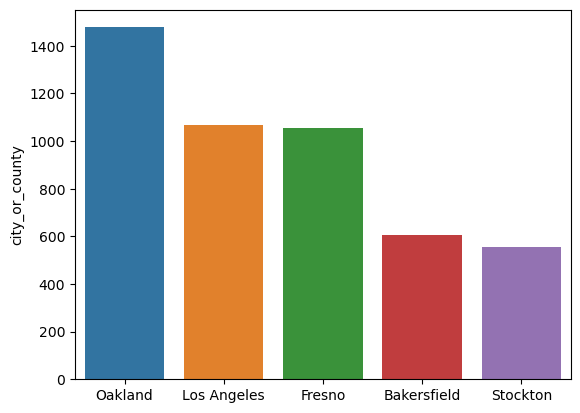

In [27]:
sns.barplot(x=crimen_df.city_or_county.value_counts().head().index, y=crimen_df.city_or_county.value_counts().head() )

La ciudad de **Oakland** contiene la mayor cantidad de delitos

### Latitud y longitud

La cantidad de datos faltantes de latitud y longitud es la misma. En este caso, mediante una segunda fuente de datos, obtendremos las coordenadas aproximadas.
Los datos nulos serán reemplazados por los datos obtenidos desde el otro dataframe y le incluiremos las columnas:
 - `population`
 - `density`
Estas nos ayudarán a profundizar nuestra investigación

In [28]:
cities_df = pd.read_csv("data/uscities.csv")
cities_df.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36061,New York,40.6943,-73.9249,18713220,10715,polygon,False,True,America/New_York,1,11229 11226 11225 11224 11222 11221 11220 1138...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1139,-118.4068,12750807,3276,polygon,False,True,America/Los_Angeles,1,90291 90293 90292 91316 91311 90037 90031 9000...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8373,-87.6862,8604203,4574,polygon,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7839,-80.2102,6445545,5019,polygon,False,True,America/New_York,1,33129 33125 33126 33127 33128 33149 33144 3314...,1840015149
4,Dallas,Dallas,TX,Texas,48113,Dallas,32.7936,-96.7662,5743938,1526,polygon,False,True,America/Chicago,1,75287 75098 75233 75254 75251 75252 75253 7503...,1840019440


#### Filtremos los datos
Solo nos interesa el estado de California

In [29]:
cities_df = cities_df[cities_df["state_name"] == "California"]
cities_df.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1139,-118.4068,12750807,3276,polygon,False,True,America/Los_Angeles,1,90291 90293 90292 91316 91311 90037 90031 9000...,1840020491
12,San Francisco,San Francisco,CA,California,6075,San Francisco,37.7562,-122.4430,3592294,7256,polygon,False,True,America/Los_Angeles,1,94130 94131 94132 94133 94134 94109 94108 9410...,1840021543
14,San Diego,San Diego,CA,California,6073,San Diego,32.8312,-117.1225,3220118,1686,polygon,False,True,America/Los_Angeles,1,92109 92108 92103 92111 92154 92110 92115 9214...,1840021990
20,Riverside,Riverside,CA,California,6065,Riverside,33.9381,-117.3948,2107852,1574,polygon,False,True,America/Los_Angeles,1,92508 92503 92501 92505 92504 92507 92506 9250...,1840020551
26,Sacramento,Sacramento,CA,California,6067,Sacramento,38.5667,-121.4683,1898019,2029,polygon,False,True,America/Los_Angeles,1,95820 95838 95832 95833 95831 95834 95835 9581...,1840021491


Ahora imputamos la latitud y la longitud y unimos las columnas `population` y `density` al dataframe

In [30]:
for index, row in crimen_df.iterrows():

    if pd.isnull(row["latitude"]):
        try:
            lat = cities_df[cities_df["city"] == row["city_or_county"]]["lat"]
            crimen_df.at[index, "latitude"] = lat
        except:
            pass

    if pd.isnull(row["longitude"]):
        try:
            lng = cities_df[cities_df["city"] == row["city_or_county"]]["lng"]
            crimen_df.at[index, "longitude"] = lng
        except:
            pass

    try:
        population = cities_df[cities_df["city"] == row["city_or_county"].strip()]["population"]
        crimen_df.at[index, "population"] = population
    except:
        pass

    try:
        density = cities_df[cities_df["city"] == row["city_or_county"].strip()]["density"]
        crimen_df.at[index, "density"] = density
    except:
        pass

crimen_df.head()

,incident_id,state,city_or_county,n_killed,n_injured,latitude,longitude,n_guns_involved,participant_age_group,participant_gender,participant_type,year,population,density
0,460726,California,Hawthorne,1,3,33.9090,-118.333,0.0,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2013,NaN,NaN
1,479389,California,Brentwood,0,4,37.9656,-121.718,0.0,0::Teen 12-17||1::Teen 12-17||2::Teen 12-17||4...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2013,64474.0,1675.0
2,479580,California,Yuba (county),1,3,39.1236,-121.583,1.0,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Female||4::Male||5::Male|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2013,NaN,NaN
3,480311,California,Vallejo,1,4,38.1072,-122.228,0.0,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Female||4::Female,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2013,173256.0,1524.0
4,480358,California,Orange (county),4,3,33.8031,-117.943,1.0,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||4::Male||5::Male||6::Male,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2013,NaN,NaN


Reducimos los datos faltantes de latitud y longitud lo máximo posible

In [31]:
print(f" Cantidad de datos nulos de la columna latitud: {crimen_df['latitude'].isna().sum() }\n Cantidad de datos nulos de la columna longitud: {crimen_df['longitude'].isna().sum()}")

 Cantidad de datos nulos de la columna latitud: 30
 Cantidad de datos nulos de la columna longitud: 30


#### Nueva limpieza de nulos

Eliminamos los datos vacios para una mejor investigacion

In [32]:
crimen_df = crimen_df[crimen_df["latitude"].notna()]
crimen_df = crimen_df[crimen_df["longitude"].notna()]
crimen_df = crimen_df[crimen_df["population"].notna()]
crimen_df = crimen_df[crimen_df["density"].notna()]

 ## Columna gravedad_crimen
 Nuestro target

Creamos una funcion que detecte segun la cantidad de heridos y muertos el nivel de gravedad que tiene cada crimen

In [33]:
def gravedad(n_killed, n_injured):
    if n_killed == 0 and n_injured >=0:
        return 0
    elif n_killed > 0 and n_injured >=0:
        return 1

Lo clasificamos de la siguiente forma:
- si tiene heridos pero no muertos, la gravedad es de clase 0
- si tiene heridos y muertos, la gravedad es de clase 1

Ahora agregamos y aplicamos esta funcion para cada caso

In [34]:

nueva_columna = "gravedad_crimen"

crimen_df[nueva_columna] = 0

for index, row in crimen_df.iterrows():
    y_value = gravedad(row["n_killed"], row["n_injured"])
    crimen_df.at[index, nueva_columna] = y_value


In [35]:
crimen_df.head(10)

,incident_id,state,city_or_county,n_killed,n_injured,latitude,longitude,n_guns_involved,participant_age_group,participant_gender,participant_type,year,population,density,gravedad_crimen
1,479389,California,Brentwood,0,4,37.9656,-121.718,0.0,0::Teen 12-17||1::Teen 12-17||2::Teen 12-17||4...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2013,64474.0,1675.0,0
3,480311,California,Vallejo,1,4,38.1072,-122.228,0.0,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Female||4::Female,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2013,173256.0,1524.0,1
5,480407,California,Lancaster,0,4,34.6666,-118.131,0.0,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2013,343304.0,645.0,0
6,481213,California,Los Banos,1,3,37.0857,-120.828,1.0,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,3::Male||4::Male||5::Male,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2013,41036.0,1585.0,1
7,482801,California,Oceanside,2,2,33.2498,-117.309,0.0,0::Teen 12-17||1::Teen 12-17||2::Teen 12-17||3...,0::Male||1::Male||4::Male||5::Male||6::Male||7...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2013,175742.0,1644.0,1
8,482838,California,Modesto,0,4,37.6260,-121.011,0.0,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Female,0::Victim||1::Victim||2::Victim||3::Victim,2013,383134.0,1933.0,0
9,482926,California,Galt,0,7,38.2436,-121.312,0.0,-,-,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2013,27954.0,1505.0,0
10,482934,California,Stockton,2,3,37.9531,-121.266,0.0,0::Adult 18+||1::Adult 18+||2::Adult 18+,0::Male||1::Female||2::Female,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2013,397264.0,1941.0,1
12,483878,California,Long Beach,1,3,33.8479,-118.190,0.0,0::Adult 18+,0::Male||1::Male||2::Male||3::Male,0::Victim||1::Victim||2::Victim||3::Victim,2013,462628.0,3523.0,1
13,484279,California,Vallejo,0,4,38.1519,-122.261,0.0,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Female,0::Victim||1::Victim||2::Victim||3::Victim,2013,173256.0,1524.0,0


In [36]:
categories = sorted(crimen_df[nueva_columna].unique(), reverse=False)
categories

[0, 1]

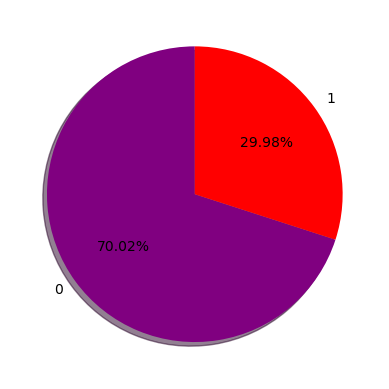

In [37]:
amounts = []
colors = ["purple", "red"]
for cat in categories:
    amount_tmp = len(crimen_df.loc[crimen_df['gravedad_crimen']==cat,])
    amounts.append(amount_tmp)
plt.pie(amounts, labels=categories, startangle = 90, autopct='%1.2f%%', shadow=True, colors=colors)
plt.show()

Podemos observar que en el 70% de los casos la gravedad fue baja, mientras que en el otro 30% la gravedad fue alta

### Variables categoricas

Ahora vamos a enfocarnos en las columnas categóricas, entre ellas:
- `participant_age_group`
- `participant_type`
- `participant_gender`

Veamos sus valores unicos

In [38]:
print(f"Cantidad de valores unicos de panticipant_age_group son {crimen_df.participant_age_group.nunique()}")
print(f"Cantidad de valores unicos de panticipant_type son {crimen_df.participant_type.nunique()}")
print(f"Cantidad de valores unicos de panticipant_gender son {crimen_df.participant_gender.nunique()}")


Cantidad de valores unicos de panticipant_age_group son 196
Cantidad de valores unicos de panticipant_type son 104
Cantidad de valores unicos de panticipant_gender son 186


Tenemos un monton de categorias, por ello decidimos segmentar estos datos
Creamos columnas con cada categoria

In [39]:
crimen_df["number_implicates"] = 0
crimen_df["exist_suspect"] = False
crimen_df["male_involved"] = False
crimen_df["female_involved"] = False
crimen_df["child_involved"] = False
crimen_df["teen_involved"] = False
crimen_df["adult_involved"] = False

Ahora relacionaremos estas nuevas columnas con nuestros datos originales.

In [40]:
for index, row in crimen_df.iterrows():

    if "male" in row["participant_gender"].lower():
        crimen_df.at[index, "male_involved"] = True

    if "female" in row["participant_gender"].lower():
        crimen_df.at[index, "female_involved"] = True

    if "child" in row["participant_age_group"].lower():
        crimen_df.at[index, "child_involved"] = True

    if "teen" in row["participant_age_group"].lower():
        crimen_df.at[index, "teen_involved"] = True

    if "adult" in row["participant_age_group"].lower():
        crimen_df.at[index, "adult_involved"] = True

    if row["participant_type"] != "-":
        all_involveds = row["participant_type"].split("||")
        crimen_df.at[index, "number_implicates"] = len(all_involveds)

    if "suspect" in row["participant_type"].lower():
        crimen_df.at[index, "exist_suspect"] = True

crimen_df.head()

,incident_id,state,city_or_county,n_killed,n_injured,latitude,longitude,n_guns_involved,participant_age_group,participant_gender,...,population,density,gravedad_crimen,number_implicates,exist_suspect,male_involved,female_involved,child_involved,teen_involved,adult_involved
1,479389,California,Brentwood,0,4,37.9656,-121.718,0.0,0::Teen 12-17||1::Teen 12-17||2::Teen 12-17||4...,0::Male||1::Male||2::Male||3::Male||4::Male,...,64474.0,1675.0,0,5,True,True,False,False,True,True
3,480311,California,Vallejo,1,4,38.1072,-122.228,0.0,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Female||4::Female,...,173256.0,1524.0,1,5,False,True,True,False,False,True
5,480407,California,Lancaster,0,4,34.6666,-118.131,0.0,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male,...,343304.0,645.0,0,6,True,True,False,False,False,True
6,481213,California,Los Banos,1,3,37.0857,-120.828,1.0,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,3::Male||4::Male||5::Male,...,41036.0,1585.0,1,6,True,True,False,False,True,True
7,482801,California,Oceanside,2,2,33.2498,-117.309,0.0,0::Teen 12-17||1::Teen 12-17||2::Teen 12-17||3...,0::Male||1::Male||4::Male||5::Male||6::Male||7...,...,175742.0,1644.0,1,8,True,True,False,False,True,True


Una vez incoorporados los datos, eliminamos las columnas repetidas

In [41]:
eliminar = ['participant_gender','participant_age_group','participant_type']

eliminar_lista_columnas(crimen_df,eliminar)

,incident_id,state,city_or_county,n_killed,n_injured,latitude,longitude,n_guns_involved,year,population,density,gravedad_crimen,number_implicates,exist_suspect,male_involved,female_involved,child_involved,teen_involved,adult_involved
1,479389,California,Brentwood,0,4,37.9656,-121.7180,0.0,2013,64474.0,1675.0,0,5,True,True,False,False,True,True
3,480311,California,Vallejo,1,4,38.1072,-122.2280,0.0,2013,173256.0,1524.0,1,5,False,True,True,False,False,True
5,480407,California,Lancaster,0,4,34.6666,-118.1310,0.0,2013,343304.0,645.0,0,6,True,True,False,False,False,True
6,481213,California,Los Banos,1,3,37.0857,-120.8280,1.0,2013,41036.0,1585.0,1,6,True,True,False,False,True,True
7,482801,California,Oceanside,2,2,33.2498,-117.3090,0.0,2013,175742.0,1644.0,1,8,True,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16301,1082266,California,Palmdale,1,0,34.5713,-118.0450,1.0,2018,155079.0,564.0,1,2,True,True,False,False,False,True
16302,1082089,California,San Diego,0,0,32.8936,-117.1360,1.0,2018,3220118.0,1686.0,0,1,True,True,False,False,False,True
16303,1082394,California,Shafter,0,0,35.5019,-119.2830,1.0,2018,21734.0,203.0,0,1,True,True,False,False,False,True
16304,1082392,California,Oakland,1,0,37.7903,-122.2165,1.0,2018,433031.0,2991.0,1,1,False,True,False,False,False,True


## Distribución del target

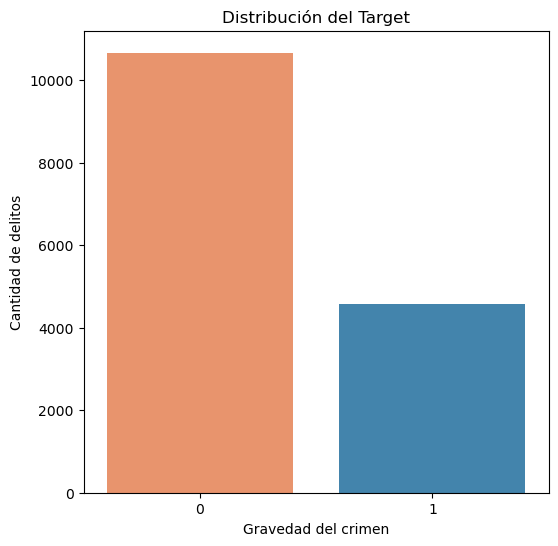

In [42]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 6,6
paleta = ["#fc8d59","#3288bd"]

crimen_df['gravedad_crimen'].value_counts()
sns.countplot(x='gravedad_crimen', data=crimen_df, palette=paleta)
plt.xlabel("Gravedad del crimen")
plt.ylabel("Cantidad de delitos")
plt.title("Distribución del Target")
plt.show()



g_zero = len(crimen_df[crimen_df['gravedad_crimen']=='0'])
g_one = len(crimen_df[crimen_df['gravedad_crimen']=='1'])

## Relación population-density

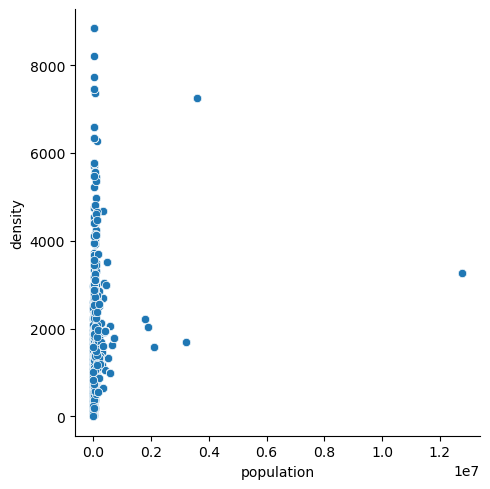

In [43]:
sns.relplot(x='population', y='density', data=crimen_df)
plt.show()

Podemos notar outliers en cuanto aumenta la población

## Crimenes por año

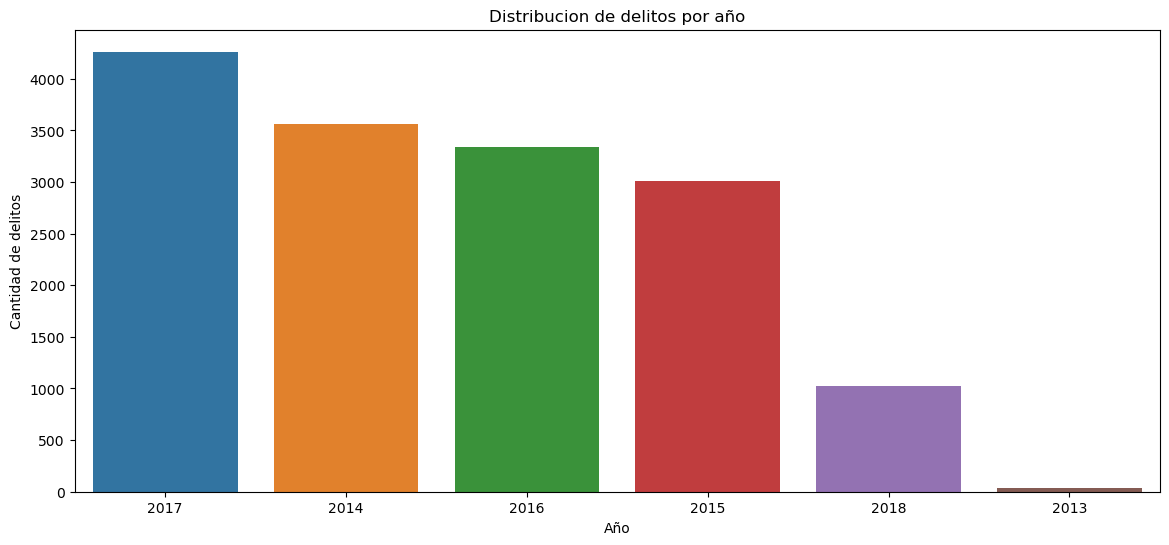

In [44]:
rcParams['figure.figsize'] = 14,6
crimenes = sns.countplot(x = 'year', data = crimen_df,
              order = crimen_df['year'].value_counts().index)
plt.xlabel("Año")
plt.ylabel("Cantidad de delitos")
plt.title("Distribucion de delitos por año")
plt.show(crimenes)

En el año 2017 se encuentra la cantidad máxima de delitos, podemos notar que en 2018 la cantida disminuyó notablemente.

## Género en los delítos

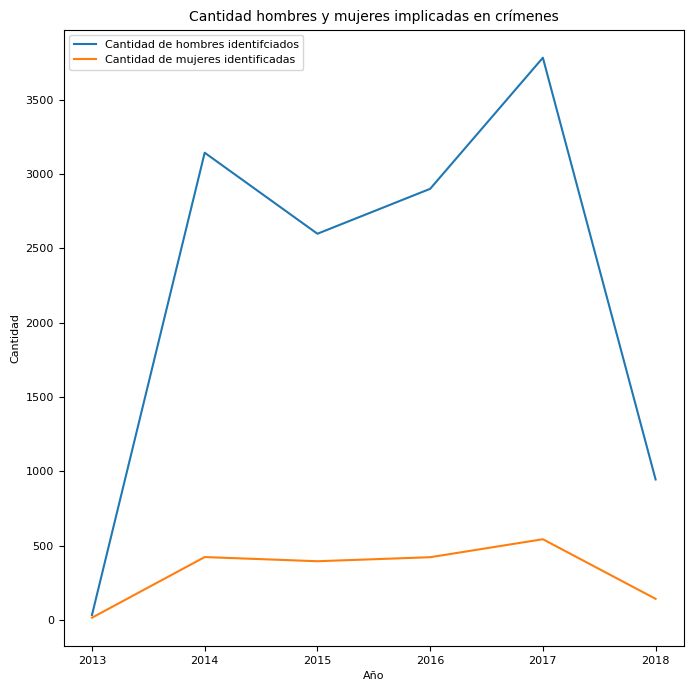

In [45]:
plt.figure(figsize=(8, 8))
sns.lineplot(data=crimen_df.groupby(by='year')['male_involved'].sum(), label="Cantidad de hombres identifciados")
sns.lineplot(data=crimen_df.groupby(by='year')['female_involved'].sum(), label="Cantidad de mujeres identificadas")

plt.xlabel("Año", size=8)
plt.ylabel("Cantidad", size=8)
plt.tick_params(labelsize=8)
plt.legend(loc=2,prop={'size':8})
plt.title("Cantidad hombres y mujeres implicadas en crímenes", size=10)
plt.show()

En la gran mayoria de los crimenes estan involucrados los hombres, mientras que las mujeres participan mucho menos

A continuación, antes de realizar el escalado de las variables verifiquemos que el data set ya no tiene datos vacíos

In [46]:
crimen_df.isnull().sum().sort_values(ascending=False)

incident_id          0
density              0
teen_involved        0
child_involved       0
female_involved      0
male_involved        0
exist_suspect        0
number_implicates    0
gravedad_crimen      0
population           0
state                0
year                 0
n_guns_involved      0
longitude            0
latitude             0
n_injured            0
n_killed             0
city_or_county       0
adult_involved       0
dtype: int64

Efectivamente, ya tenemos el data set completamente limpio. Podemos proceseguir con los pasos

# <center>Escalado</center>

In [47]:
numericas = crimen_df.select_dtypes(exclude=['object', 'boolean']).columns
for variable in numericas:
    print(variable)

incident_id
n_killed
n_injured
latitude
longitude
n_guns_involved
population
density
gravedad_crimen
number_implicates


Ignoramos las variables `incident_id` porque no es importante para nuestro objetivo y `gravedad_crimen` porque es nuestro target

In [48]:
eliminar_columna(crimen_df,'incident_id')
crimen_df.head()

,state,city_or_county,n_killed,n_injured,latitude,longitude,n_guns_involved,year,population,density,gravedad_crimen,number_implicates,exist_suspect,male_involved,female_involved,child_involved,teen_involved,adult_involved
1,California,Brentwood,0,4,37.9656,-121.718,0.0,2013,64474.0,1675.0,0,5,True,True,False,False,True,True
3,California,Vallejo,1,4,38.1072,-122.228,0.0,2013,173256.0,1524.0,1,5,False,True,True,False,False,True
5,California,Lancaster,0,4,34.6666,-118.131,0.0,2013,343304.0,645.0,0,6,True,True,False,False,False,True
6,California,Los Banos,1,3,37.0857,-120.828,1.0,2013,41036.0,1585.0,1,6,True,True,False,False,True,True
7,California,Oceanside,2,2,33.2498,-117.309,0.0,2013,175742.0,1644.0,1,8,True,True,False,False,True,True


## Cantidad de personas fallecidas

<AxesSubplot:title={'center':'Boxplot den_killed'}, xlabel='n_killed'>

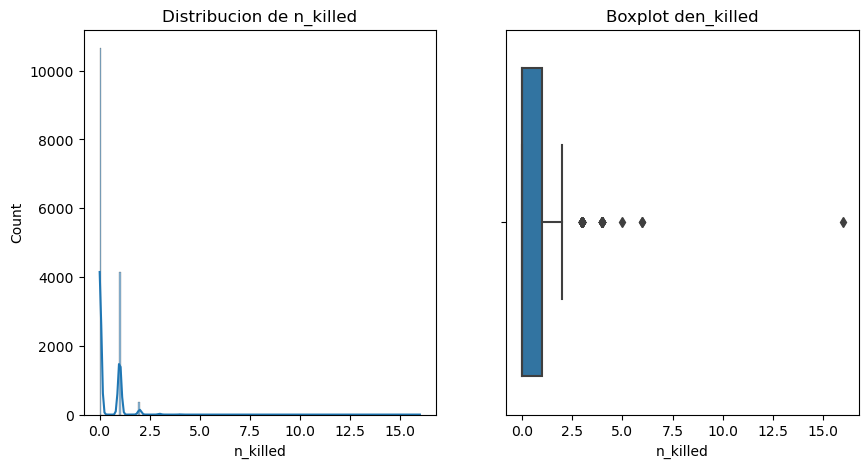

In [49]:
variable = 'n_killed'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = crimen_df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = crimen_df, x = f"{variable}", ax=ax[1])

- NO ES NORMAL
- TIENE OUTLIERS
Debemos hacer escalado MinMaxScaler()

## Cantidad personas heridas

<AxesSubplot:title={'center':'Boxplot den_injured'}, xlabel='n_injured'>

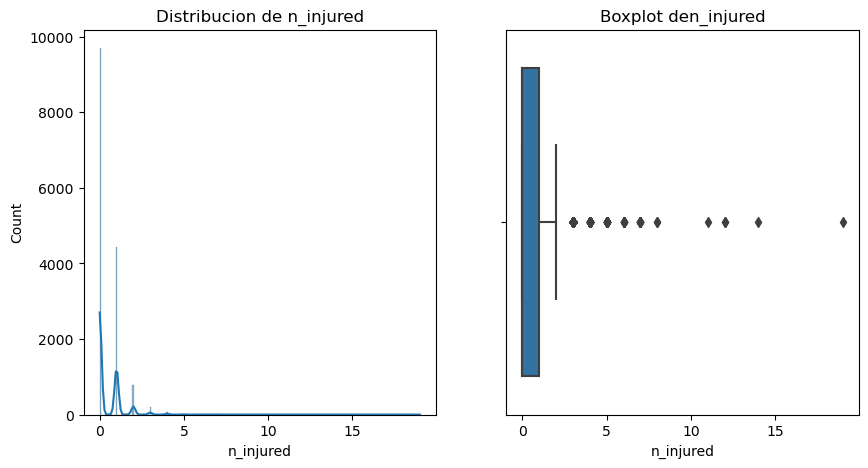

In [50]:
variable = 'n_injured'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = crimen_df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = crimen_df, x = f"{variable}", ax=ax[1])

- NO ES NORMAL
- TIENE OUTLIERS
Debemos hacer escalado MinMaxScaler()

## Cantidad de armas involucradas

<AxesSubplot:title={'center':'Boxplot den_guns_involved'}, xlabel='n_guns_involved'>

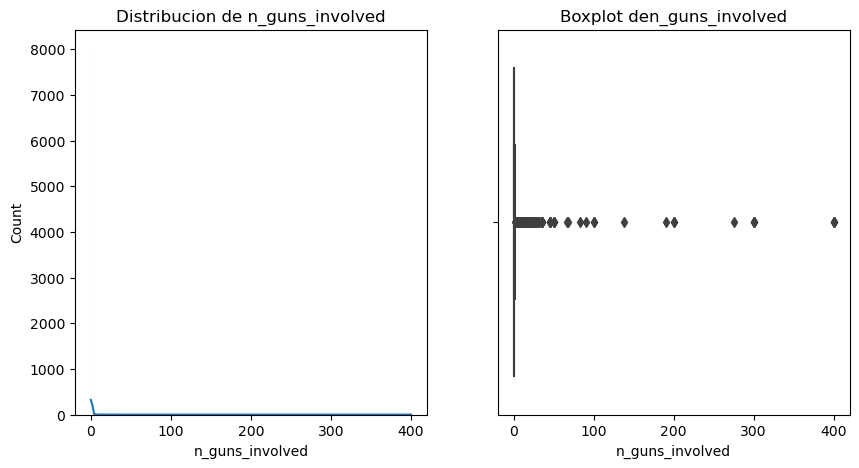

In [51]:
variable = 'n_guns_involved'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = crimen_df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = crimen_df, x = f"{variable}", ax=ax[1])

- NO ES NORMAL
- TIENE OUTLIERS
Debemos hacer escalado MinMaxScaler()

## Población

<AxesSubplot:title={'center':'Boxplot depopulation'}, xlabel='population'>

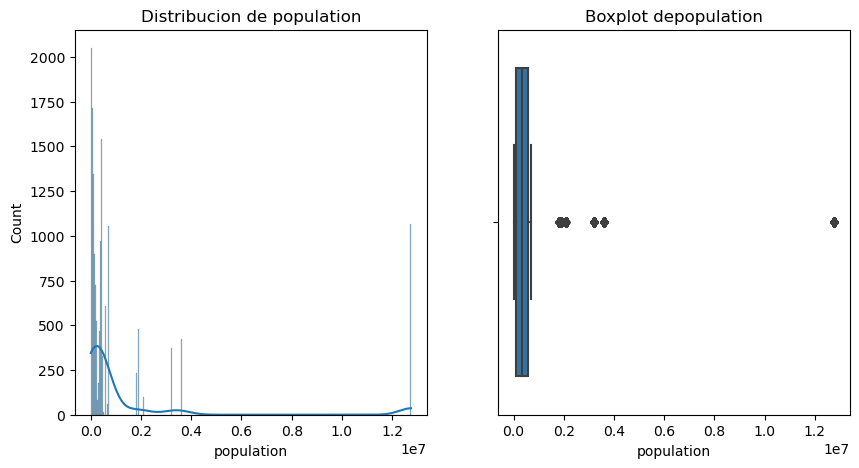

In [52]:
variable = 'population'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = crimen_df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = crimen_df, x = f"{variable}", ax=ax[1])

- NO ES NORMAL
- TIENE OUTLIERS
Debemos hacer escalado MinMaxScaler()

## Densidad de la población

<AxesSubplot:title={'center':'Boxplot dedensity'}, xlabel='density'>

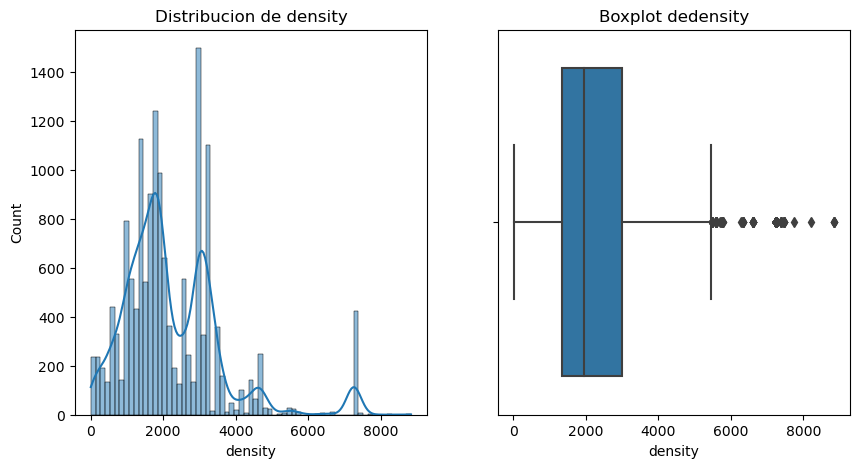

In [53]:
variable = 'density'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = crimen_df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = crimen_df, x = f"{variable}", ax=ax[1])

- NO ES NORMAL
- TIENE OUTLIERS
Debemos hacer escalado MinMaxScaler()

## Numero de implicados

<AxesSubplot:title={'center':'Boxplot denumber_implicates'}, xlabel='number_implicates'>

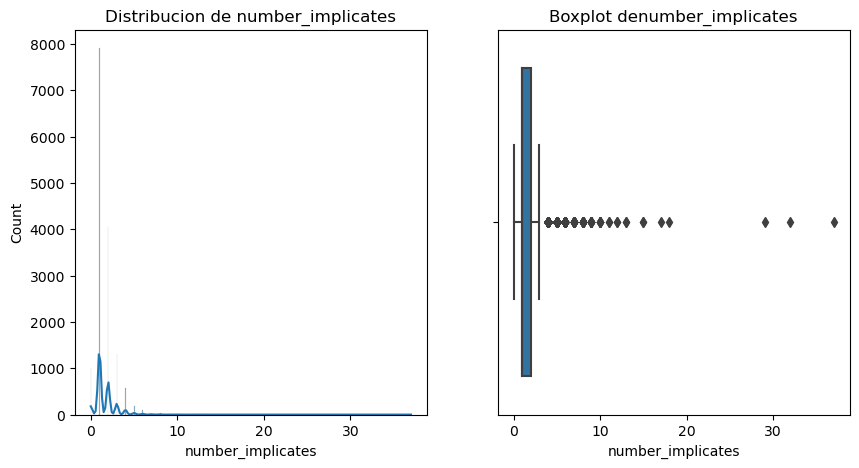

In [54]:
variable = 'number_implicates'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = crimen_df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = crimen_df, x = f"{variable}", ax=ax[1])

- NO ES NORMAL
- TIENE OUTLIERS
Debemos hacer escalado MinMaxScaler()

## Latitud

<AxesSubplot:title={'center':'Boxplot delatitude'}, xlabel='latitude'>

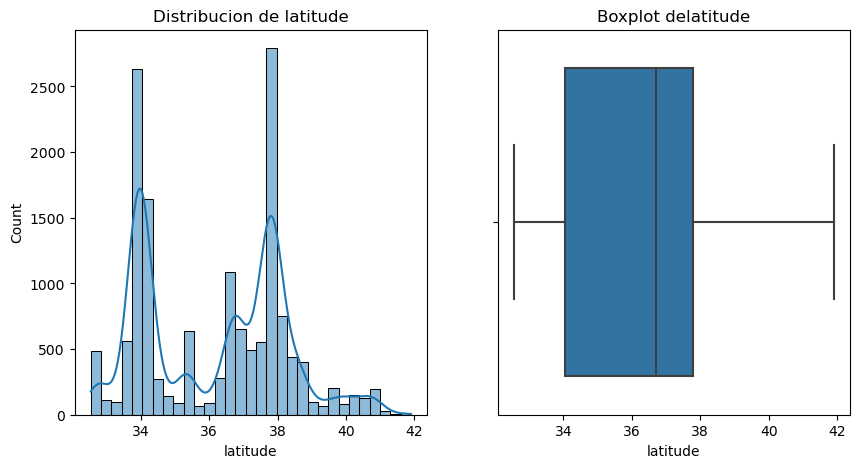

In [55]:
variable = 'latitude'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = crimen_df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = crimen_df, x = f"{variable}", ax=ax[1])

- NO ES NORMAL
- TIENE OUTLIERS
Debemos hacer escalado MinMaxScaler()

## Longitud

<AxesSubplot:title={'center':'Boxplot delongitude'}, xlabel='longitude'>

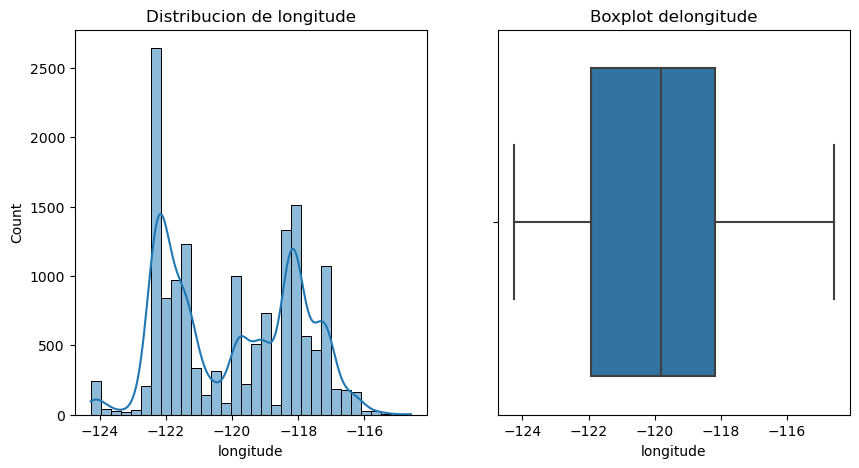

In [56]:
variable = 'longitude'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = crimen_df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = crimen_df, x = f"{variable}", ax=ax[1])

- NO ES NORMAL
- TIENE OUTLIERS
Debemos hacer escalado MinMaxScaler()

De todas nuestras variables numéricas, podemos observar que ninguna tiene una distribucion normal y todas contienen outliers, por estas razones, realizaremos escalado minimo maximo

# MinMaxScaler()

In [57]:
from sklearn.preprocessing import MinMaxScaler

minmaxscaler = MinMaxScaler()

crimen_df['n_killed'], crimen_df['n_injured'], crimen_df['n_guns_involved'], crimen_df['population'], crimen_df['density'], crimen_df['number_implicates'], crimen_df['latitude'], crimen_df['longitude'] = minmaxscaler.fit_transform(crimen_df[['n_killed', 'n_injured','n_guns_involved','population','density','number_implicates', 'latitude','longitude' ]]).T

crimen_df.head()

,state,city_or_county,n_killed,n_injured,latitude,longitude,n_guns_involved,year,population,density,gravedad_crimen,number_implicates,exist_suspect,male_involved,female_involved,child_involved,teen_involved,adult_involved
1,California,Brentwood,0.0000,0.210526,0.579488,0.263305,0.0000,2013,0.005055,0.189360,0,0.135135,True,True,False,False,True,True
3,California,Vallejo,0.0625,0.210526,0.594627,0.210602,0.0000,2013,0.013586,0.172269,1,0.135135,False,True,True,False,False,True
5,California,Lancaster,0.0000,0.210526,0.226790,0.633977,0.0000,2013,0.026922,0.072779,0,0.162162,True,True,False,False,False,True
6,California,Los Banos,0.0625,0.157895,0.485417,0.355275,0.0025,2013,0.003216,0.179174,1,0.162162,True,True,False,False,True,True
7,California,Oceanside,0.1250,0.105263,0.075319,0.718921,0.0000,2013,0.013781,0.185852,1,0.216216,True,True,False,False,True,True


# <center> Encoding variables categóricas </center>

In [58]:
categoricas = crimen_df.select_dtypes(exclude=['float', 'integer']).columns
categoricas

Index(['state', 'city_or_county', 'year', 'exist_suspect', 'male_involved',
       'female_involved', 'child_involved', 'teen_involved', 'adult_involved'],
      dtype='object')

In [59]:
print(f"Los valores únicos de state: {crimen_df.state.unique()}")
print(f"Los valores únicos de exist_suspect: {crimen_df.exist_suspect.unique()}")
print(f"Los valores únicos de male_involved: {crimen_df.male_involved.unique()}")
print(f"Los valores únicos de female_involved: {crimen_df.female_involved.unique()}")
print(f"Los valores únicos de child_involved: {crimen_df.child_involved.unique()}")
print(f"Los valores únicos de teen_involved: {crimen_df.teen_involved.unique()}")
print(f"Los valores únicos de adult_involved: {crimen_df.adult_involved.unique()}")

Los valores únicos de state: ['California']
Los valores únicos de exist_suspect: [ True False]
Los valores únicos de male_involved: [ True False]
Los valores únicos de female_involved: [False  True]
Los valores únicos de child_involved: [False  True]
Los valores únicos de teen_involved: [ True False]
Los valores únicos de adult_involved: [ True False]


Debido aque estas variables, solo cuentan con dos categóricas, se aplica un encoding binario, con el OneHotEncoder.

In [60]:
print(f"Los valores únicos de year: {crimen_df.year.unique()}")
print(f"Cantidad de valores de city_or_country: {crimen_df.city_or_county.nunique()}")
print(f"Los valores únicos de city_or_country: {crimen_df.city_or_county.unique()}")


Los valores únicos de year: ['2013' '2014' '2015' '2016' '2017' '2018']
Cantidad de valores de city_or_country: 674
Los valores únicos de city_or_country: ['Brentwood' 'Vallejo' 'Lancaster' 'Los Banos' 'Oceanside' 'Modesto'
 'Galt' 'Stockton' 'Long Beach' 'Palo Alto' 'Los Angeles' 'Bakersfield'
 'Santa Monica' 'Sacramento' 'Three Rivers' 'San Francisco' 'Oakland'
 'Madera' 'Salinas' 'Fresno' 'Roseville' 'Perris' 'Duarte' 'Merced'
 'Glendale' 'San Jose' 'National City' 'Vista' 'Chico' 'San Diego'
 'Visalia' 'Planada' 'Fairfield' 'Redding' 'Compton' 'Cathedral City'
 'Pomona' 'Hawaiian Gardens' 'San Bernardino' 'San Leandro'
 'Hacienda Heights' 'Santa Maria' 'Santa Ana' 'Inglewood' 'South Pasadena'
 'Eureka' 'Joshua Tree' 'San Carlos' 'Corona' 'Monterey Park' 'Azusa'
 'Santa Rosa' 'Pasadena' 'Menlo Park' 'Riverside' 'Oroville' 'Concord'
 'Highland' 'Union City' 'Millbrae' 'Jurupa Valley' 'Trinidad' 'Fillmore'
 'Parlier' 'Coalinga' 'Delano' 'Chula Vista' 'Victorville' 'Winton' 'Mesa'
 'Ea

Por otro lado, estas otras variables cuentan con más de 2 categorías por lo que tendremos que realizar OneHOtEncoder() pero en vez de transformar las categorias con 1 y 0, creamos a cada categorias una columna, donde si cumple con su caracteristica toomará el valor de 1 y sino el valor de 0.

La variable `city_or_country` cuenta con 674 valores, como no es influyente en nuestro data set porque todos los delitos ocurrieron en California, eliminaremos esta columna.

In [61]:
eliminar_columna(crimen_df,'city_or_county')
crimen_df.head()

,state,n_killed,n_injured,latitude,longitude,n_guns_involved,year,population,density,gravedad_crimen,number_implicates,exist_suspect,male_involved,female_involved,child_involved,teen_involved,adult_involved
1,California,0.0000,0.210526,0.579488,0.263305,0.0000,2013,0.005055,0.189360,0,0.135135,True,True,False,False,True,True
3,California,0.0625,0.210526,0.594627,0.210602,0.0000,2013,0.013586,0.172269,1,0.135135,False,True,True,False,False,True
5,California,0.0000,0.210526,0.226790,0.633977,0.0000,2013,0.026922,0.072779,0,0.162162,True,True,False,False,False,True
6,California,0.0625,0.157895,0.485417,0.355275,0.0025,2013,0.003216,0.179174,1,0.162162,True,True,False,False,True,True
7,California,0.1250,0.105263,0.075319,0.718921,0.0000,2013,0.013781,0.185852,1,0.216216,True,True,False,False,True,True


# OneHotEncoder()

In [62]:
from sklearn.preprocessing import OneHotEncoder

binary_encoder = OneHotEncoder(sparse=False, drop='if_binary')

crimen_df['exist_suspect'] = binary_encoder.fit_transform(crimen_df[['exist_suspect']])
crimen_df['male_involved'] = binary_encoder.fit_transform(crimen_df[['male_involved']])
crimen_df['female_involved'] = binary_encoder.fit_transform(crimen_df[['female_involved']])
crimen_df['child_involved'] = binary_encoder.fit_transform(crimen_df[['child_involved']])
crimen_df['teen_involved'] = binary_encoder.fit_transform(crimen_df[['teen_involved']])
crimen_df['adult_involved'] = binary_encoder.fit_transform(crimen_df[['adult_involved']])
crimen_df['state'] = binary_encoder.fit_transform(crimen_df[['state']])



crimen_df.head()

,state,n_killed,n_injured,latitude,longitude,n_guns_involved,year,population,density,gravedad_crimen,number_implicates,exist_suspect,male_involved,female_involved,child_involved,teen_involved,adult_involved
1,1.0,0.0000,0.210526,0.579488,0.263305,0.0000,2013,0.005055,0.189360,0,0.135135,1.0,1.0,0.0,0.0,1.0,1.0
3,1.0,0.0625,0.210526,0.594627,0.210602,0.0000,2013,0.013586,0.172269,1,0.135135,0.0,1.0,1.0,0.0,0.0,1.0
5,1.0,0.0000,0.210526,0.226790,0.633977,0.0000,2013,0.026922,0.072779,0,0.162162,1.0,1.0,0.0,0.0,0.0,1.0
6,1.0,0.0625,0.157895,0.485417,0.355275,0.0025,2013,0.003216,0.179174,1,0.162162,1.0,1.0,0.0,0.0,1.0,1.0
7,1.0,0.1250,0.105263,0.075319,0.718921,0.0000,2013,0.013781,0.185852,1,0.216216,1.0,1.0,0.0,0.0,1.0,1.0


In [63]:
year_ohe = OneHotEncoder(sparse=False)

crimen_df['2013'],crimen_df['2014'],crimen_df['2015'],crimen_df['2016'],crimen_df['2017'],crimen_df['2018'] = year_ohe.fit_transform(crimen_df[['year']]).T

crimen_df.drop(columns=['year'], inplace = True)

crimen_df.head()

,state,n_killed,n_injured,latitude,longitude,n_guns_involved,population,density,gravedad_crimen,number_implicates,...,female_involved,child_involved,teen_involved,adult_involved,2013,2014,2015,2016,2017,2018
1,1.0,0.0000,0.210526,0.579488,0.263305,0.0000,0.005055,0.189360,0,0.135135,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0625,0.210526,0.594627,0.210602,0.0000,0.013586,0.172269,1,0.135135,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0000,0.210526,0.226790,0.633977,0.0000,0.026922,0.072779,0,0.162162,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0625,0.157895,0.485417,0.355275,0.0025,0.003216,0.179174,1,0.162162,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.1250,0.105263,0.075319,0.718921,0.0000,0.013781,0.185852,1,0.216216,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


## Encoding de nuestro target

Para nuestro target utilizamos LabelEncoder

In [64]:
from sklearn.preprocessing import LabelEncoder

crimen_df['gravedad_crimen'] = LabelEncoder().fit_transform(crimen_df['gravedad_crimen'])
crimen_df.head()

,state,n_killed,n_injured,latitude,longitude,n_guns_involved,population,density,gravedad_crimen,number_implicates,...,female_involved,child_involved,teen_involved,adult_involved,2013,2014,2015,2016,2017,2018
1,1.0,0.0000,0.210526,0.579488,0.263305,0.0000,0.005055,0.189360,0,0.135135,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0625,0.210526,0.594627,0.210602,0.0000,0.013586,0.172269,1,0.135135,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0000,0.210526,0.226790,0.633977,0.0000,0.026922,0.072779,0,0.162162,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0625,0.157895,0.485417,0.355275,0.0025,0.003216,0.179174,1,0.162162,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.1250,0.105263,0.075319,0.718921,0.0000,0.013781,0.185852,1,0.216216,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


# MODELO 1
Creación de nuestro primer modelo luego de la eliminación de los datos faltantes, antes de realizar el escalado

Creamos una regresión logística
Separamos la variable dependiente `gravedad_crimen`
Luego separaremos la data entre entrenamiento y prueba
Las primeras entrenan el modelo
Las segundas hacen la prueba de prediccion

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


X = crimen_df.drop(columns=['gravedad_crimen'])
y = crimen_df['gravedad_crimen']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

model = LogisticRegression()

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

model.score(X_test, y_test)

C:\Users\Usuario\anaconda3\envs\progrmacion_orientada_objetos\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9927758318739054

Ahora lo que hacemos es probando estratificar la variable target, dependiente. Porque queremos que esta siempre tenga la misma proporción en todas las pruebas que se hagan

# MODELO 2


In [66]:
X = crimen_df.drop(columns=['gravedad_crimen'])
y = crimen_df['gravedad_crimen']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y ,random_state=10)

model = LogisticRegression()

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

model.score(X_test, y_test)

C:\Users\Usuario\anaconda3\envs\progrmacion_orientada_objetos\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9921190893169878

Podemos notar que el modelo, luego de estratificar empeoró muy poco

Ahora veamos el modelo con las variables que son fuertemente influyentes sobre nuestro target

En este caso realizaremos el modelo con nuestra data filtrada por las variables más importantes, las cuales son `n_killed`, `n_injured`, `n_guns_involved`, `male_involved` , `adult_involved`, `population` y `number_implicates`

Las primeras 3 nos ayudan a medir la gravedad del crímen
`male_involved` y `adult_involved` son las características de las personas que participan con más freceuncia en eventos de este tipo
Las últimas 2 ejercen información sobre la cantidad de personas en el estado de California y cuántas participaron alguna vez en un crímen, ya sea como victima, sospechoso o culpable

In [67]:
df_filtrado = crimen_df[['n_killed', 'n_injured', 'n_guns_involved', 'male_involved', 'adult_involved','gravedad_crimen', 'population', 'number_implicates']]

In [68]:
df_filtrado.head()

,n_killed,n_injured,n_guns_involved,male_involved,adult_involved,gravedad_crimen,population,number_implicates
1,0.0000,0.210526,0.0000,1.0,1.0,0,0.005055,0.135135
3,0.0625,0.210526,0.0000,1.0,1.0,1,0.013586,0.135135
5,0.0000,0.210526,0.0000,1.0,1.0,0,0.026922,0.162162
6,0.0625,0.157895,0.0025,1.0,1.0,1,0.003216,0.162162
7,0.1250,0.105263,0.0000,1.0,1.0,1,0.013781,0.216216


In [69]:
X = df_filtrado.drop(columns=['gravedad_crimen'])
y = df_filtrado['gravedad_crimen']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

model = LogisticRegression()

model.fit(X_train,y_train)
y_pred0 = model.predict(X_test)

model.score(X_test, y_test)

0.9962784588441331

Mejoramos notablemente el modelo

# Matriz de confusion

In [70]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)

print('True Positive: ', confusion[0][0], 'False Negative: ', confusion[0][1])
print('False Positive: ', confusion[1][0], 'True Negative: ', confusion[1][1])

True Positive:  3232 False Negative:  0
False Positive:  17 True Negative:  1319


*True positive and True negative*

- 3232 casos fueron marcados con gravedad baja y efectivamente tuvieron gravedad baja
- 1319 casos fueron marcados con gravedad alta y tuvieron gravedad baja


*False positive and False negative*
- 0 casos fueron marcados con gravedad baja y fueron gravedad alta
- 17 casos fueron marcados con gravedad alta y efectivamente fueron de gravedad alta

# Métricas

In [71]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3232
           1       1.00      0.99      0.99      1336

    accuracy                           1.00      4568
   macro avg       1.00      0.99      1.00      4568
weighted avg       1.00      1.00      1.00      4568



El modelo es casi perfecto, tiene una presición muy alta, es decir, la mayoria de las ocaciones acierta la categoría, y un recall del 100%, lo que nos dice que es un modelo fiable

# Conclusiones

Hemos conseguido que un modelo sobre la base de datos filtrada logre predecir que tipo de gravedad será cada evento.
Con los resultados que obtuvimos podemos decir que el modelo es un cierto extremista. Tiene gran presición cuando se trata de una gravedad baja, pero no tanto cuando la gravedad es alta.
Podemos ver que hay 0 casos donde era de gravedad alta y se confundio con gravedad baja. Esto nos garantiza que su desempeño correcto en estos casos.
Pero cuando es al reves, el modelo confunde la gravedad alta demasiadas veces cuando en realdiad es gravedad baja. Es necesario prestarle atención a este punto, porque los costos de un procedimiento policial no es el mismo para una gravedad alta que para una gravedad baja.

Entonces, para finalizar, el modelo tiene un buen desempeño cuando debe predecir crimenes de gravedad baja, no así cuando debe predecir crimenes con gravedad alta.
